# 3.1 프로야구 선수의 다음 해 연봉 예측

- __회귀 분석__  
: 독립변수(X)와 종속변수(Y) 간의 관계를 찾아내는 것.  
: 실제 데이터와 거리가 최소가 되는 방정식(선)을 찾아내는 것.  
: 즉, 방정식의 계수 w와 b를 잘 정하는 것. 

## 1) 탐색 : 프로야구 연봉 데이터 살펴보기

```
총 152개 데이터, 22개 feature로 구성
22개의 feature : 선수가 가지고 있는 기록(승, 패, 홈런 등의 수치)들에 대한 세부 정보 나타냄
이번 예제에서 예측할 회귀 분석의 target값(Y) : '연봉(2018)'
```

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

picher_file_path = 'data/picher_stats_2017.csv'
batter_file_path = 'data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

print(picher.columns)
print(batter.columns)

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')
Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')


In [2]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인

{'? ??',
 '???',
 '????',
 '??????',
 'AmeriGarmnd BT',
 'Ami R',
 'Arial',
 'Bahnschrift',
 'Baskerville BT',
 'Batang',
 'BernhardFashion BT',
 'Blippo Blk BT',
 'Bodoni Bd BT',
 'Bodoni Bk BT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'BroadwayEngraved BT',
 'BrushScript BT',
 'Calibri',
 'Cambria',
 'Candara',
 'CentSchbook BT',
 'Century',
 'Century Gothic',
 'Comic Sans MS',
 'CommercialScript BT',
 'Consolas',
 'Constantia',
 'Cooper Blk BT',
 'Corbel',
 'Courier New',
 'Courier10 BT',
 'DAUL-EQN2',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'DomCasual BT',
 'Dubai',
 'Ebrima',
 'FZShuTi',
 'FZSong_Superfont',
 'FZYaoTi',
 'Franklin Gothic Medium',
 'Freehand591 BT',
 'Freestyle Script',
 'French Script MT',
 'FuturaBlack BT',
 'Gabriola',
 'Gadugi',
 'Garamond',
 'Georgia',
 'GoudyOlSt BT',
 'Gulim',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Dotum',
 'HCR Dotum Ext',
 'HYGothic

In [3]:
mpl.rc('font', family='New Gulim') # 내 OS에 존재하는 한글 폰트를 선택

In [4]:
print(picher.shape)
picher.head()

(152, 22)


,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
print(batter.shape)
batter.head()

(191, 21)


,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


#### _'연봉(2018)' feature 시각화_

In [6]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

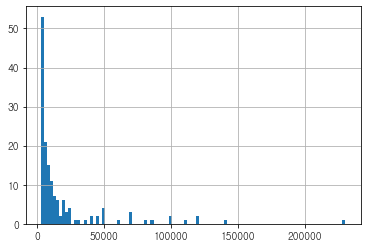

In [7]:
# 2018년 연봉 분포 출력
picher['연봉(2018)'].hist(bins=100)

- 히스토그램 : 연봉의 분포를 파악할 수 있다. 

<AxesSubplot:>

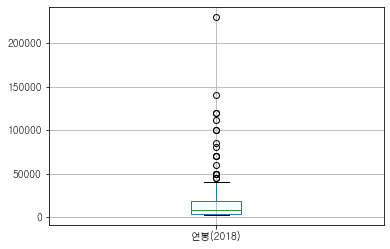

In [8]:
# 연봉의 상자 그림 출력
picher.boxplot(column=['연봉(2018)'])

- 상자 그림 : 연봉의 일반적인 범주를 파악할 수 있다. 

=> 흔히 말하는 '수십억대 연봉'을 받는 프로 선수는 별로 많지 않으며, 5억 원 미만의 연봉이 일반적인 것으로 보임

#### _모든 수치형 features 시각화_

In [9]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

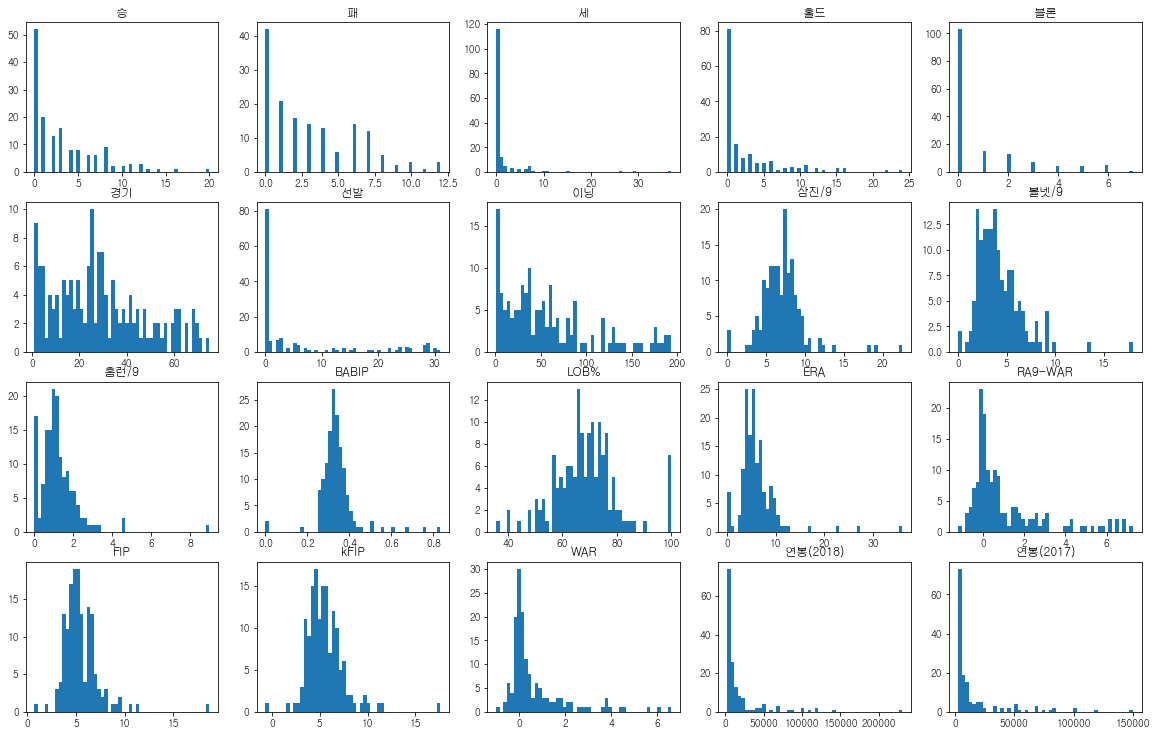

In [10]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', 
                             '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 
                             'WAR', '연봉(2018)', '연봉(2017)']] # 수치형 features

# feature 각각에 대한 히스토그램 출력
def plot_hist_each_columns(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_columns(picher_features_df)

- 몇몇 features 매우 불균형한 분포 갖고 있음을 알 수 있다.  
- 각 feature 간의 단위가 다르다.  
    -> ex) '홈런/9'라는 feature는 x축이 0-8 사이 / '이닝'이라는 feature는 0-200 사이의 값 포함  
    -> 정규화 or scaling이 되어 있지 않은 데이터이기 때문

(참고)  
- feature의 정규화  
: 좁은 의미로 __feature scaling__ 을 의미한다.  
: 만약 '키'와 '몸무게'라는 2개의 feature로 나이를 예측하는 회귀분석을 한다고 할 때, 회귀분석은 '키를 나타내는 상수'에 의해 더 큰 영향을 받을 수 있다.(같은 단위라면 몸무게보다는 키의 값이 더 크기 때문)  
: 이러한 feature들의 단위를 0-1 사이, 혹은 상대적 값을 표현할 수 있는 수치로 맞춰주는 것이 __feature scaling__ 이다.  
: 전체 데이터 내에서의 상대적인 계산을 통해 150-180이었던 키를 0-1 사이의 값으로 표현하고 몸무게도 0-1 사이의 값으로 표현하는 것을 예로 들 수 있다.

## 2) 예측 : 투수의 연봉 예측

- 여러 가지 feature scaling 방법 중 _표준화 방법_ 적용
- __표준화__ 는 정규분포에서의 z-값을 구하는 과정과 동일

#### _연속형 feature 단위 맞추기 : feature scaling_

In [11]:
# pandas 형태로 정의된 데이터를 출력할 때 float 모양으로 출력되게 해줌
pd.options.mode.chained_assignment = None

# feature 각각에 대한 scaling을 수행하는 함수를 정의
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
    return df


# 수치형 features (연봉(2018) 제외)
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9','볼넷/9',
                 '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR','연봉(2017)']

In [12]:
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


#### _범주형 feature 단위 맞추기 : one-hot encoding_

- get_dummies()라는 함수로 간단하게 원-핫 인코딩 적용 가능
- 과일 종류가 3개라면 3개의 벡터로 표현할 수 있다.  
|  |사과|오렌지|키위|
|:---:|:--:|:----:|:---:|
|사과|1|0|0|
오렌지|0|1|0|
|키위|0|0|1|

In [13]:
team_encoding = pd.get_dummies(picher_df['팀명'])
print(team_encoding.shape)
team_encoding.head()

(152, 9)


,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [14]:
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


#### _회귀 분석 적용_

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [16]:
# 회귀 분석 계수 학습 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수 출력
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


## 3) 평가 : 예측 모델 평가

- 회귀 분석은 statsmodel 라이브러리의 OLS 클래스로도 실행 가능
- OLS 클래스의 summary() 함수 : 계수에 대한 자세한 분석 내용 살펴볼 수 있음.
- 최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)을 최소화하는 가중치 벡터를 구하는 방법

In [17]:
import statsmodels.api as sm 

X_train = sm.add_constant(X_train) # 상수항 결합
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           7.70e-42
Time:                        15:48:21   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.58e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

- __결정계수(R-squared) / 수정 결정계수(Adj. R-squared)__  
: 회귀 분석이 얼마나 잘 되었는지 평가하는 지표.  
: '회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?'에 대한 점수  
: 이 점수들이 1에 가까울수록 데이터를 잘 설명하는 모델이라고 볼 수 있다.  

- F 통계량 (F-statistic)  
: 회귀식의 __유의성 검정__에 사용되는 값으로 F 통계량에 대한 p-value인 Prob (F-statistic) 수치와 함께 살펴봐야 한다.  
: 일반적으로 p-value < 0.05 이면 'F 통계량이 유의한 의미를 가진다'는 결론을 내려도 무방하며, 이는 회귀 분석이 유의미한 결과를 가진다는 것이다.  

- P>|t|  
: 각 feature의 __검정 통계량 (t-statistic)이 얼마나 유의미한지__에 대한 p-value를 나타내는 것.  
: 위 분석에서는 <span style="color:green">'WAR', '연봉(2017)', '한화' </span>3개 feature의 p-value가 < 0.05 이므로 __회귀 분석에서 유의미한 features__라는 결론을 내릴 수 있다.

#### _가장 영향력이 강한 feature 확인 위한 시각화_

In [18]:
# 한글 출력 위한 사전 설정 단계
mpl.rc('font', family='New Gulim') # 내 OS에 존재하는 한글 폰트를 선택
plt.rcParams['figure.figsize'] = [20,20]

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

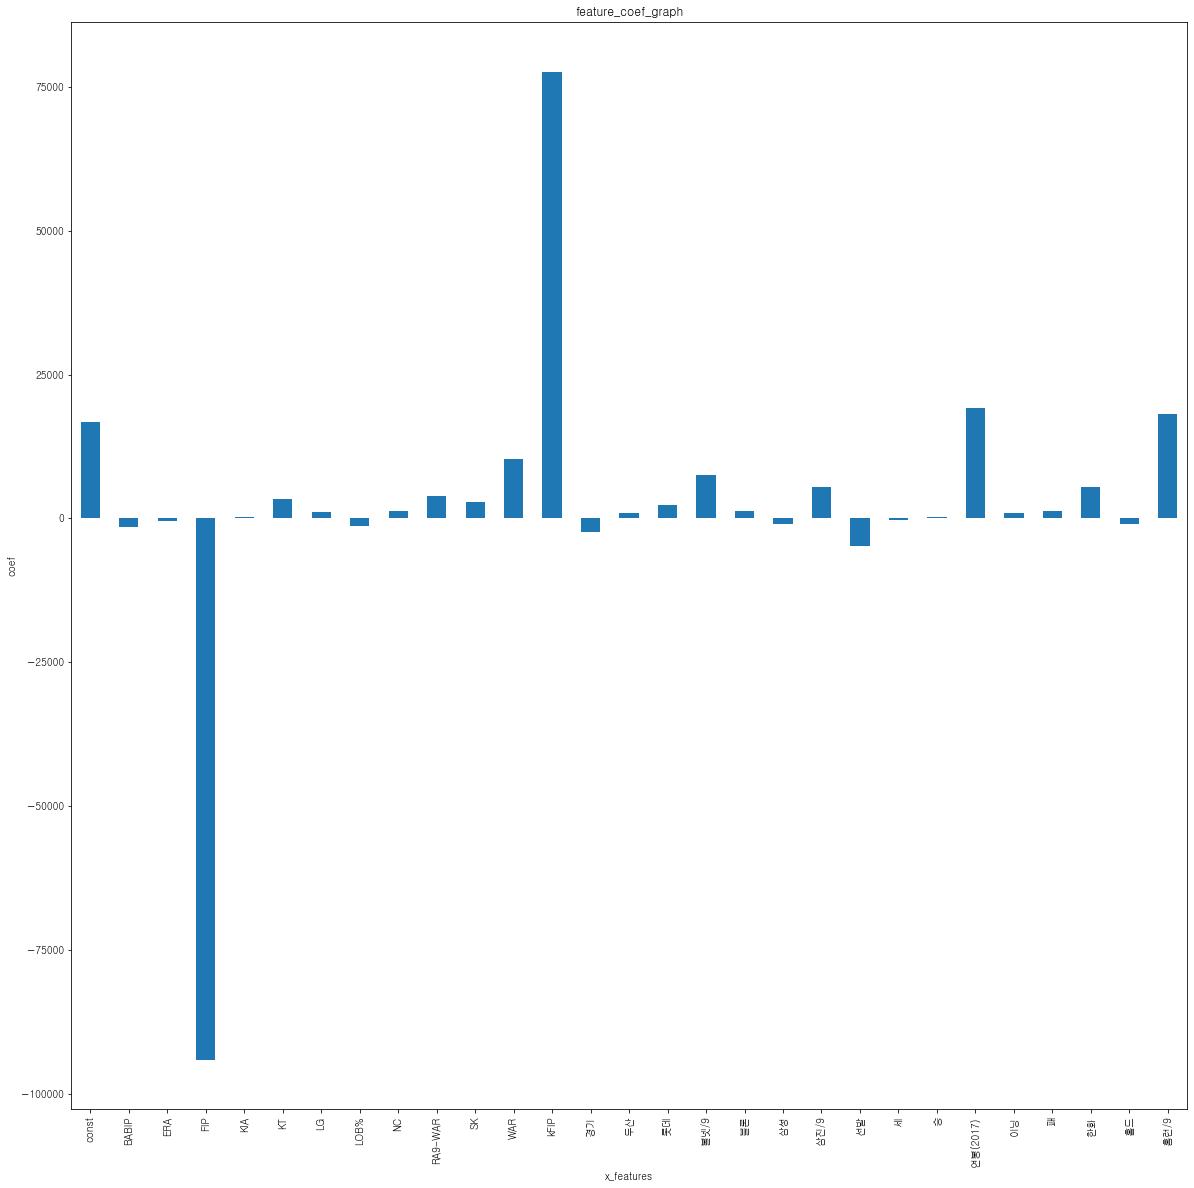

In [19]:
# 회귀 계수 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명 리스트로 반환
x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

- 시각화 결과 : 'FIP', 'WAR', '홈런', '작년 연봉' feature가 가장 영향력이 큰 것으로 보인다. 
- 현재까지 feature 탐색 결과 정리
|feature명|유의미한가?|영향력이 큰가?|
|:-------:|:---------:|:------------:|
|FIP|X|O|
|WAR|O|O|
|홈런|X|O|
|작년 연봉|O|O|
|팀(한화)|O|△|

#### R2 score로 평가

In [20]:
X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

print(model.score(X_train, y_train)) # train R2 score 출력
print(model.score(X_test, y_test)) # test R2 score 출력

0.9276949405576705
0.8860171644977811


- train R2 score, test R2 score는 최대한 벌어지지 않는 것이 좋다. (과적합 발생 위험)

#### _RMSE로 평가_
- 회귀 모델 평가 시 __RMSE score__ 측정 지표를 활용할 수도 있다. 이 점수는 실제값과 예측값의 차이를 _절대적인 수치_ 로 나타낸 것이다. 이 값이 높으면 높을수록 예측이 부정확하다는 것을 의미한다.

In [21]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score 출력

y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score 출력

7282.7186847463745
14310.69643688917


#### _features 상관 관계 분석_

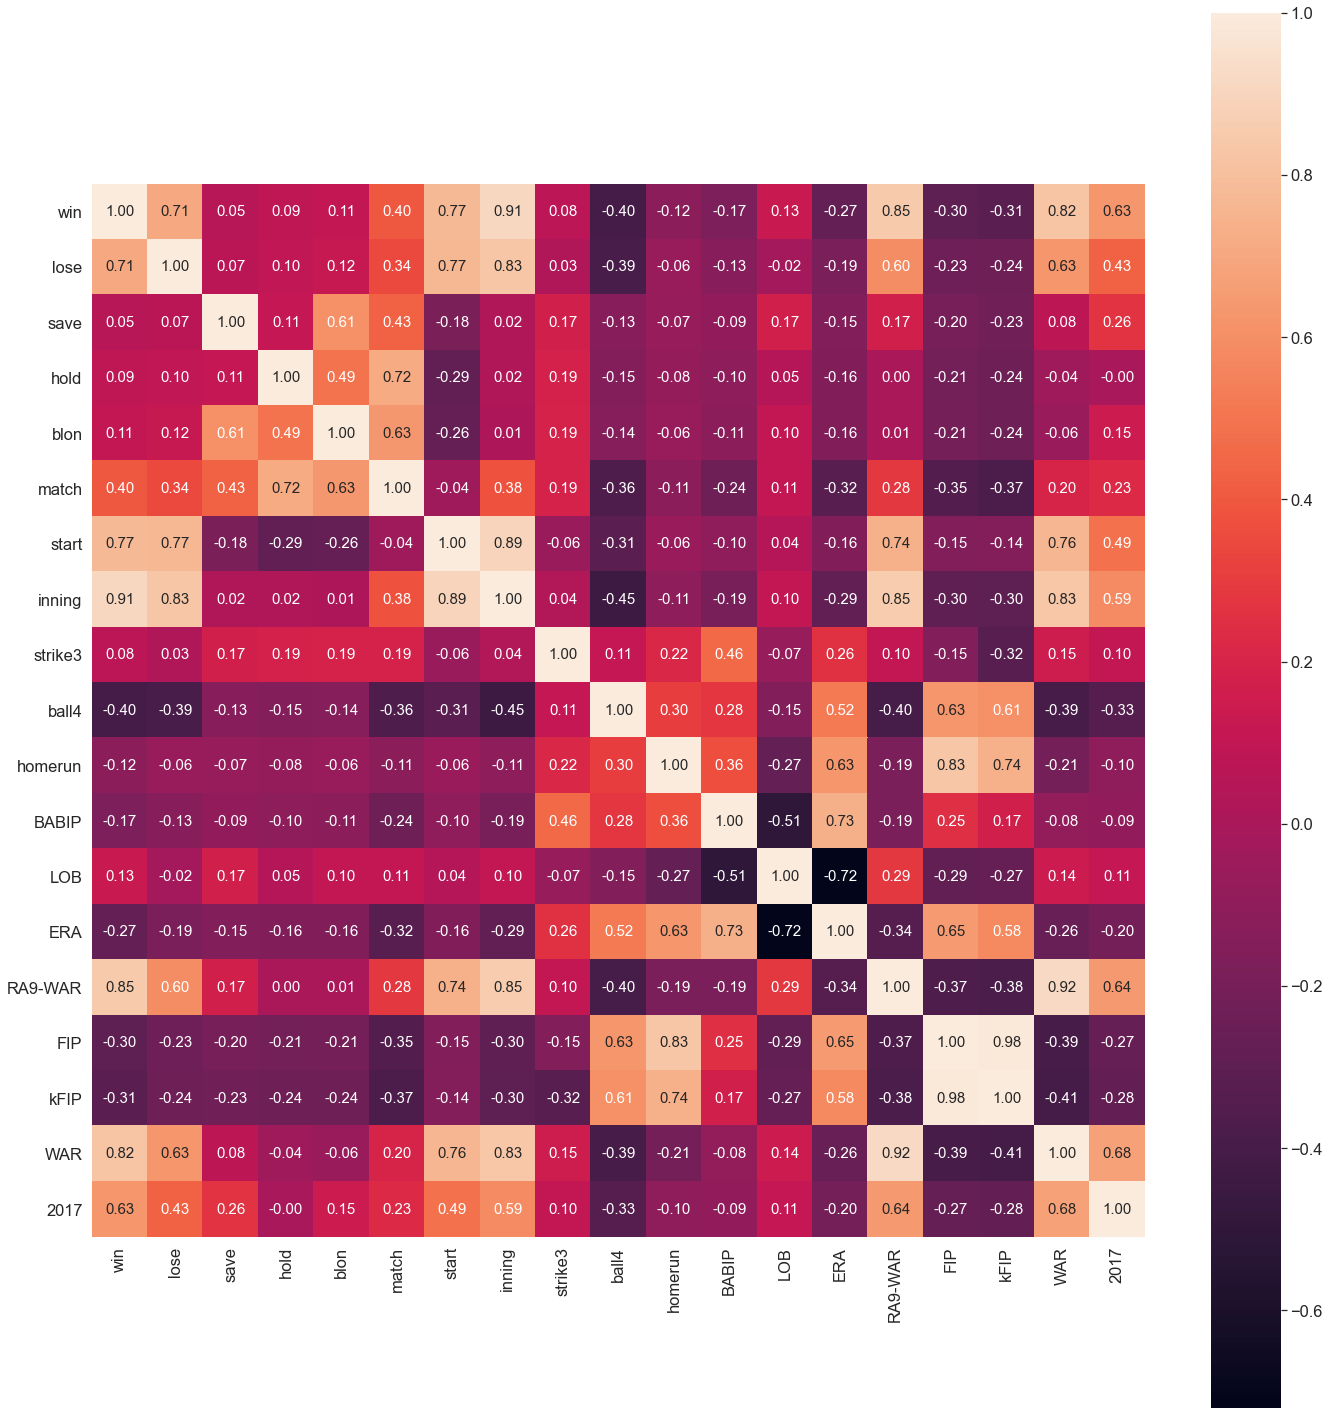

In [22]:
import seaborn as sns

# feature 간의 상관계수 행렬 계산
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 heatmap 시각화
plt.rc('font', family='New Gulim')
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=show_cols,
                xticklabels=show_cols)
plt.tight_layout()
plt.show()

- 승-이닝, kFIP-FIP, RA9_WAR-WAR 등의 featre 쌍에서 높은 연관성 발견
- 하지만 회귀 분석은 feature 간의 __'독립성'__ 을 전제로 하는 분석 방법이다.  
    => 때문에 올바른 회귀 분석을 하려면 이러한 feature 쌍을 제거해야 한다.  
    => __다중 공선성__ 살펴보기  
    
- __다중 공선성__ ?  
: 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것을 의미  
: 다중 공선성을 살펴봄으로써 여러 feature 간의 연관성을 고려했을 때 어떤 feature를 제거하는 것이 옳은 판단일지 혹은 제거하는 것 자체가 맞는 판단인지에 대한 기준을 제시해줄 수 있다.  

- 다중 공선성은 __분산팽창요인(VIF, Variance Inflation Factor)__ 이라는 계수로 평가할 수 있다. 
- 일반적으로 VIF 계수가 10-15 정도를 넘으면 그 feature는 다중 공선성의 문제가 발생했다고 판단한다.

#### _회귀분석 예측 성능을 높이기 위한 방법 (다중 공선성 확인)_

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature마다의 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # 데이터의 feature마다 함수 적용
vif['features'] = X.columns
vif.round(1) # 반올림

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


- 결과 : 많은 개수의 feature가 다중 공선성 문제를 가진 것을 알 수 있다. 

## 4) 적절한 features로 다시 학습

### * 적절한 features 선정 과정 *
1. VIF 계수가 높은 피처들을 우선적으로 제거한다. (단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거한다.)  
2. 다시 공선성을 검증한다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있다.  
(VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문)
3. 여전히 VIF 계수가 높은 피처들을 제거한다.
4. 남은 피처를 토대로 다시한번 회귀분석을 실시한다. __분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정한다.__  

(저자)  
<span style="color:green">['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']</span> 피처를 선정했을 때, 더욱 좋은 결과를 나타냈다.  

In [24]:
# features 재선정
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 모델 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 결과 출력
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9150591192570362
0.9038759653889863


In [25]:
# 회귀 분석 모델 평가
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE

7893.462873347694
13141.866063591095


- train_score, test_score를 비교했을 때, 기존보다 overfitting이 비교적 덜 된것으로 보이고, test RMSE 역시 감소한 것을 볼 수 있다.

In [26]:
# feature마다의 VIF 계수 출력
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


## 5) 시각화 : 분석 결과 시각화

- 회귀 분석을 통해 얻어낸 예측연봉과 2018년의 실제연봉 데이터를 비교하는 시각화 자료 만들기

In [27]:
# 2018년 연봉을 예측하여 데이터 프레임의 열로 생성
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [28]:
# 원래의 데이터 프레임을 다시 불러옴
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보 merge
result_df = picher_df.sort_values(by=['y'], ascending=False) # 2018 연봉 높은 순부터 낮은 순으로 
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left') # 선수명 기준으로 merge
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

In [29]:
result_df.head()

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,양현종,230000,163930.148696,150000
1,켈리,140000,120122.822204,85000
2,소사,120000,88127.019455,50000
3,정우람,120000,108489.464585,120000
4,레일리,111000,102253.697589,85000


In [30]:
# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index() # 인덱스 다시
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<AxesSubplot:xlabel='선수명'>

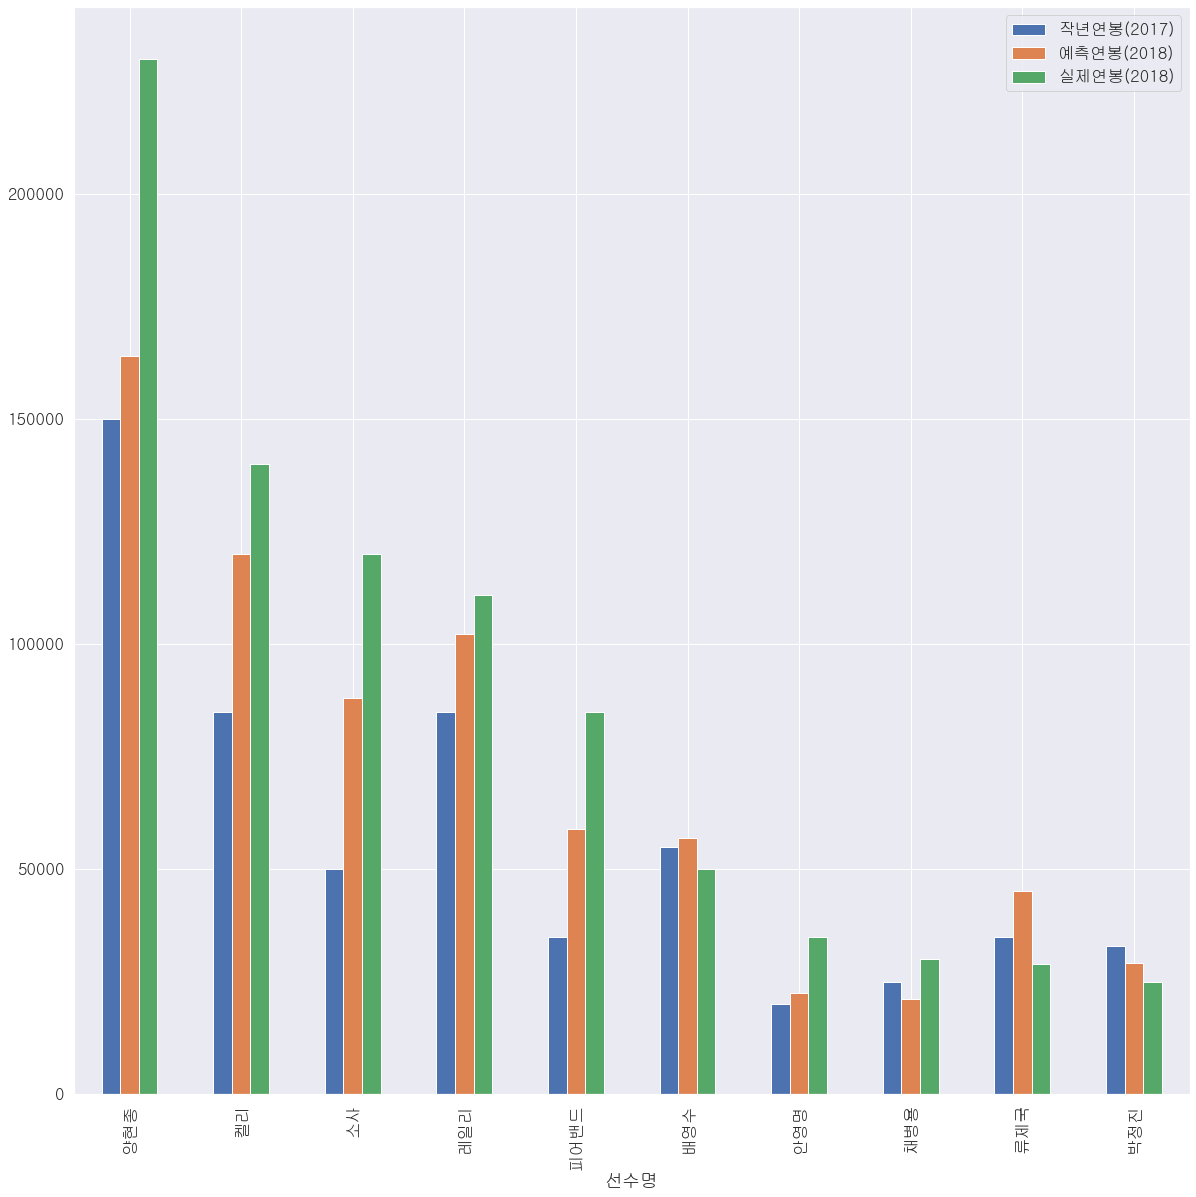

In [31]:
# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력
mpl.rc('font', family='New Gulim') # 내 OS에 존재하는 한글 폰트를 선택
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'],
              kind='bar')

- 학습한 회귀 모델은 연봉 상승의 전체적인 경향을 비교적 잘 맞춰내고 있다. 
- feature가 몇 개 되지 않는 간단한 회귀 분석이라는 것을 생각해보면 기대한 것보다는 정확한 예측 결과라고 할 수 있다.